In [12]:
# Import modules
import starwrap as sw
from matplotlib.ticker import MaxNLocator
from start_space import current_directory

In [13]:
# Import model
arg = sw.args()
arg.trainMode = 2
arg.thread = 20
arg.normalizeText = True
arg.verbose = True

sp = sw.starSpace(arg)
sp.initFromTsv(f'{current_directory}/../data/models/model.tsv')

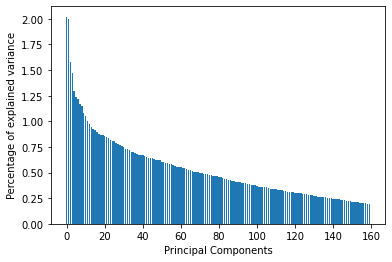

In [14]:
# Run PCA on Model and data
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

with open(f'{current_directory}/../data/twitter_test30k.txt', 'r', encoding='utf-8') as items:
    sentences = [x.split('\t')[0] for x in items]

X = np.array([np.array(sp.getDocVector(x, ' '))[0] for x in sentences])
X_std = StandardScaler().fit_transform(X)

num_components = 160
pca = PCA(n_components=num_components)
Y_sklearn = pca.fit_transform(X_std)
plt.bar(range(num_components), pca.explained_variance_ratio_ * 100)
plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variance")
plt.show()

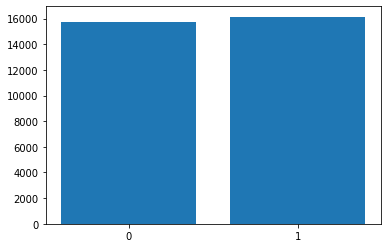

In [15]:
partitions = []
for y in Y_sklearn:
    bits = y > 0
    partition = 0
    if bits[0]:
        partition = 1
    partitions.append(partition)

labels, counts = np.unique(partitions, return_counts=True)
plt.bar(labels, counts, align='center')
ax = plt.gca()
ax.set_xticks(labels)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()